Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#### Load the movies dataset 
automobile_df = pd.read_csv('automobile.txt')

automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleansing

#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [3]:
# Code here
automobile_df.drop(["symboling", "num-of-doors","bore","stroke"],axis=1,inplace=True)


In [5]:
# Save the cleaned dataset (optional)
automobile_df.to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(automobile_df.head())

# Check data types
print(automobile_df.dtypes)

  normalized-losses         make fuel-type aspiration   body-style  \
0                 ?  alfa-romero       gas        std  convertible   
1                 ?  alfa-romero       gas        std  convertible   
2                 ?  alfa-romero       gas        std    hatchback   
3               164         audi       gas        std        sedan   
4               164         audi       gas        std        sedan   

  drive-wheels engine-location  wheel-base  length  width  ...  engine-type  \
0          rwd           front        88.6   168.8   64.1  ...         dohc   
1          rwd           front        88.6   168.8   64.1  ...         dohc   
2          rwd           front        94.5   171.2   65.5  ...         ohcv   
3          fwd           front        99.8   176.6   66.2  ...          ohc   
4          4wd           front        99.4   176.6   66.4  ...          ohc   

   num-of-cylinders engine-size fuel-system  compression-ratio horsepower  \
0              four        

#### Remove any duplicate rows

In [6]:
# Remove duplicate rows
automobile_df = automobile_df .drop_duplicates()

# Save the cleaned dataset (optional)
automobile_df .to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(automobile_df .head())

  normalized-losses         make fuel-type aspiration   body-style  \
0                 ?  alfa-romero       gas        std  convertible   
1                 ?  alfa-romero       gas        std  convertible   
2                 ?  alfa-romero       gas        std    hatchback   
3               164         audi       gas        std        sedan   
4               164         audi       gas        std        sedan   

  drive-wheels engine-location  wheel-base  length  width  ...  engine-type  \
0          rwd           front        88.6   168.8   64.1  ...         dohc   
1          rwd           front        88.6   168.8   64.1  ...         dohc   
2          rwd           front        94.5   171.2   65.5  ...         ohcv   
3          fwd           front        99.8   176.6   66.2  ...          ohc   
4          4wd           front        99.4   176.6   66.4  ...          ohc   

   num-of-cylinders engine-size fuel-system  compression-ratio horsepower  \
0              four        

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [7]:
# Replace '?' with NaN
automobile_df.replace('?', np.nan, inplace=True)

# Check for missing data
missing_data = automobile_df.isnull().sum()

# Display the missing data count for each column
print(missing_data)

normalized-losses    41
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


### Handling Missing data on Normalised-losses, horsepower,peak-rpm and price

In [27]:
#Handling normalized-losses

# Convert to numeric
automobile_df['normalized-losses'] = pd.to_numeric(automobile_df['normalized-losses'])

# Fill missing values with the mean
automobile_df['normalized-losses'].fillna(automobile_df['normalized-losses'].mean(), inplace=True)

# Save the cleaned dataset (optional)
automobile_df .to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(automobile_df .head())

    normalized-losses  make fuel-type aspiration body-style drive-wheels  \
3               164.0  audi       gas        std      sedan          fwd   
4               164.0  audi       gas        std      sedan          4wd   
6               158.0  audi       gas        std      sedan          fwd   
8               158.0  audi       gas      turbo      sedan          fwd   
10              192.0   bmw       gas        std      sedan          rwd   

   engine-location  wheel-base  length  width  ...  num-of-cylinders  \
3            front        99.8   176.6   66.2  ...              four   
4            front        99.4   176.6   66.4  ...              five   
6            front       105.8   192.7   71.4  ...              five   
8            front       105.8   192.7   71.4  ...              five   
10           front       101.2   176.8   64.8  ...              four   

    engine-size fuel-system compression-ratio  horsepower peak-rpm  city-mpg  \
3           109        mpfi   

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\44908401.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  automobile_df['normalized-losses'].fillna(automobile_df['normalized-losses'].mean(), inplace=True)


In [28]:
# Handling horse power and peak rpm

# Convert to numeric
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'])
automobile_df['peak-rpm'] = pd.to_numeric(automobile_df['peak-rpm'])

# Fill missing values with the mean
automobile_df['horsepower'].fillna(automobile_df['horsepower'].mean(), inplace=True)
automobile_df['peak-rpm'].fillna(automobile_df['peak-rpm'].mean(), inplace=True)

# Save the cleaned dataset (optional)
automobile_df .to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(automobile_df .head())


    normalized-losses  make fuel-type aspiration body-style drive-wheels  \
3               164.0  audi       gas        std      sedan          fwd   
4               164.0  audi       gas        std      sedan          4wd   
6               158.0  audi       gas        std      sedan          fwd   
8               158.0  audi       gas      turbo      sedan          fwd   
10              192.0   bmw       gas        std      sedan          rwd   

   engine-location  wheel-base  length  width  ...  num-of-cylinders  \
3            front        99.8   176.6   66.2  ...              four   
4            front        99.4   176.6   66.4  ...              five   
6            front       105.8   192.7   71.4  ...              five   
8            front       105.8   192.7   71.4  ...              five   
10           front       101.2   176.8   64.8  ...              four   

    engine-size fuel-system compression-ratio  horsepower peak-rpm  city-mpg  \
3           109        mpfi   

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\3500557781.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  automobile_df['horsepower'].fillna(automobile_df['horsepower'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_19732\3500557781.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [29]:
# Handling price 

# Convert to numeric
automobile_df['price'] = pd.to_numeric(automobile_df['price'])

# Drop rows where 'price' is missing
automobile_df.dropna(subset=['price'], inplace=True)

# Save the cleaned dataset (optional)
automobile_df .to_csv('path_to_save_cleaned_dataset.csv', index=False)

# Check again for missing data
missing_data = automobile_df.isnull().sum()
print("Missing data count for each column after handling:")
print(missing_data)
# Check data types


Missing data count for each column after handling:
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
power-to-weight      0
dtype: int64


### Finding Certain Car Types 
Locate all movies in the "Audi". 


In [30]:
# Convert data types if necessary
automobile_df['normalized-losses'] = pd.to_numeric(automobile_df['normalized-losses'], errors='coerce')
automobile_df['price'] = pd.to_numeric(automobile_df['price'], errors='coerce')
# Convert other columns as needed


In [31]:
# Filter the DataFrame to find all cars that belong to the "Audi" type
motor_make = automobile_df[automobile_df['make'].apply(lambda x: 'audi' in x)]

# Display the filtered DataFrame
print(motor_make[['normalized-losses','make']])



   normalized-losses  make
3              164.0  audi
4              164.0  audi
6              158.0  audi
8              158.0  audi


### Now onto the exploration



### Summary Statistics

In [32]:
print(automobile_df.describe())

       normalized-losses  wheel-base      length       width      height  \
count         164.000000  164.000000  164.000000  164.000000  164.000000   
mean          122.000000   98.164024  172.238415   65.598780   53.774390   
std            35.442168    5.120198   11.417833    1.923028    2.343942   
min            65.000000   86.600000  141.100000   60.300000   49.400000   
25%            94.000000   94.500000  165.675000   64.000000   52.000000   
50%           115.000000   96.550000  172.000000   65.400000   54.100000   
75%           150.000000  100.400000  177.800000   66.500000   55.500000   
max           256.000000  115.600000  202.600000   71.700000   59.800000   

       curb-weight  engine-size  compression-ratio  horsepower     peak-rpm  \
count   164.000000   164.000000         164.000000  164.000000   164.000000   
mean   2458.274390   117.957317          10.126951   96.207317  5137.804878   
std     475.087068    30.896294           3.836306   30.408563   479.459113   

# Interpretation 

Normalized-losses - The distribution is fairly wide, indicating variation in normalized losses across different cars.

Wheel base - Most cars have a wheel base around 98 units, with some variability.

Length -  Car lengths vary significantly, suggesting the presence of both compact and larger vehicles in the dataset.

Width- The width of cars shows less variability compared to length and wheel base.

Height- Similar to width, height also shows limited variability.

Curb-weight- There is a wide range in the curb weight, indicating diverse vehicle types from lightweight to heavy.

Engine size-  Engine sizes vary significantly, suggesting the inclusion of vehicles with different performance levels.

Compression ration- The compression ratio has a relatively wide range, which could indicate different engine types and performance capabilities.

Horse power- Horsepower varies greatly, reflecting a range of vehicle performances.

City MPG- City fuel efficiency varies, with some cars being more fuel-efficient than others.

High Way MPG-  highway MPG shows variability, indicating a range of fuel efficiencies.

Price- Prices range widely, suggesting a diverse set of vehicles from economy to luxury.

Power to weight ratio- The power-to-weight ratio, a key performance indicator, also shows variability.

### Count plots for categorical columns

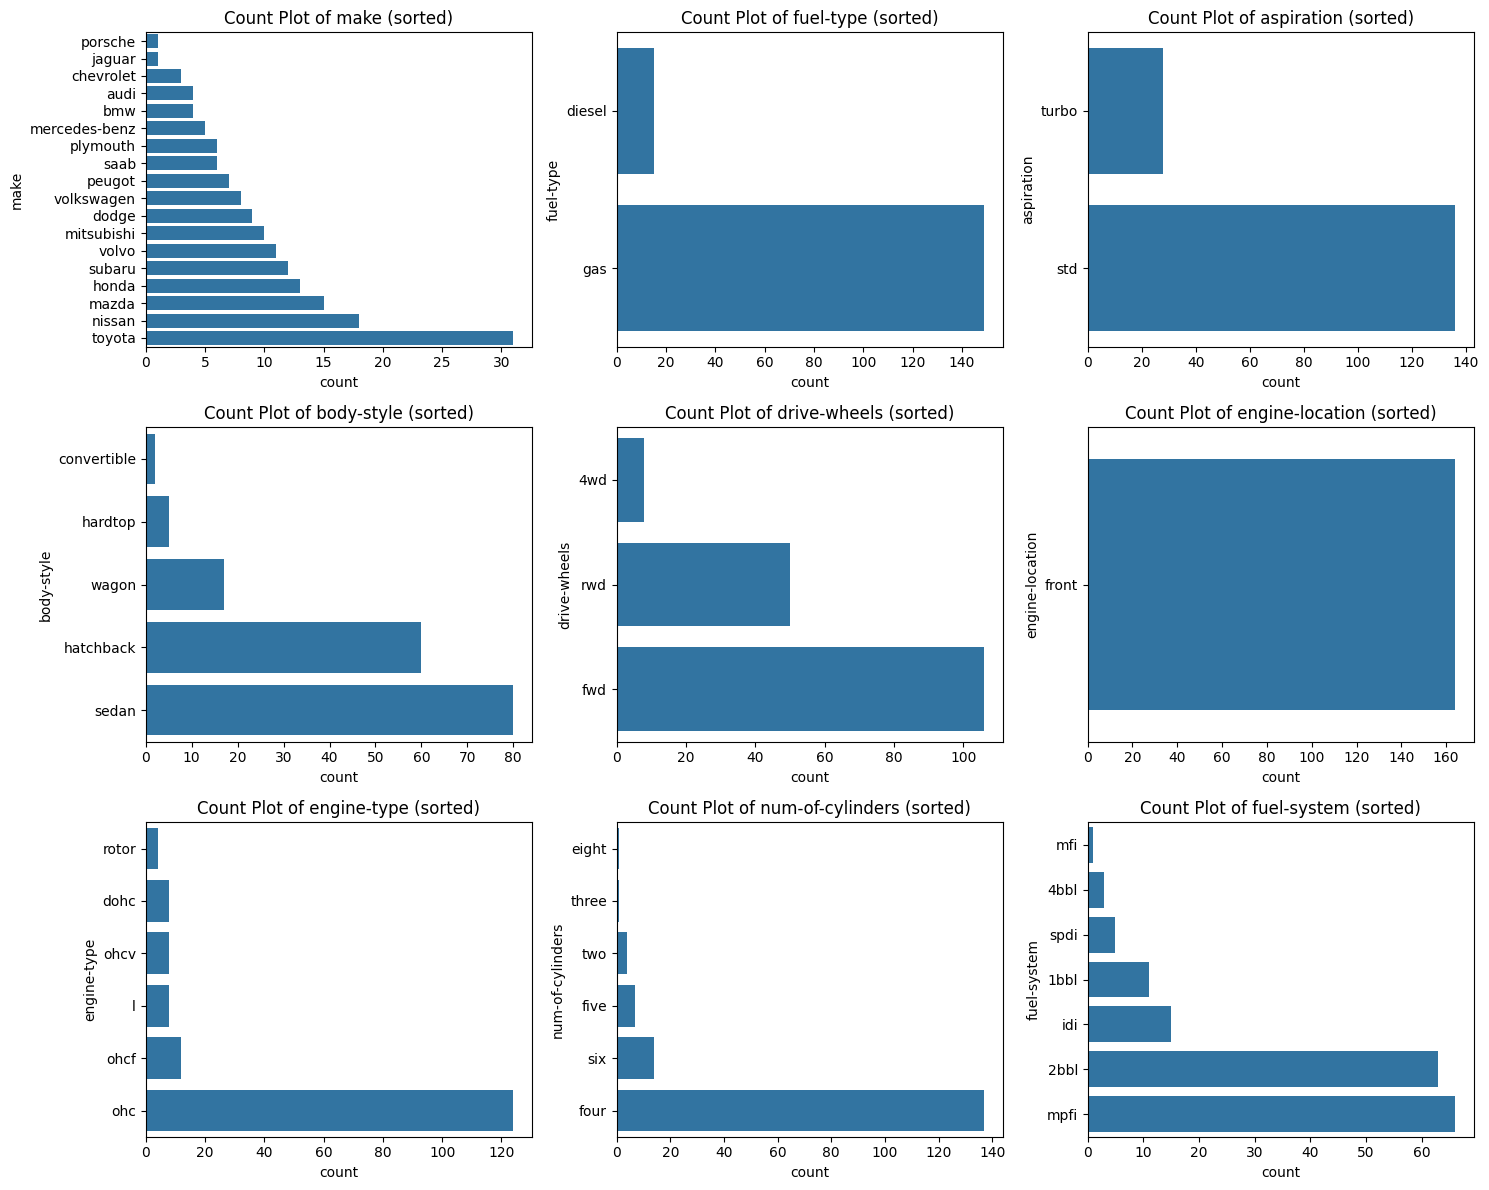

In [33]:

# Categorical columns
categorical_columns = automobile_df.select_dtypes(include=['object']).columns

# Plot count plots in a grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(categorical_columns):
    order = automobile_df[column].value_counts().sort_values().index
    sns.countplot(y=column, data=automobile_df, order=order, ax=axes[i // n_cols, i % n_cols])
    axes[i // n_cols, i % n_cols].set_title(f'Count Plot of {column} (sorted)')

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()





# Analysisng Categoriccal counts 

1. make 
The most popular make is Toyota followed by Nissan and Mazda.
Toyota's popularity might be attributed to their affordability and reliability.

2. fuel-type

The majority of cars use gas as their fuel type, with diesel being less common.
Gasoline cars might be more prevalent due to a combination of market preference, availability, and potentially lower upfront costs compared to diesel.

 3. aspiration

Most cars have a standard aspiration type, with turbocharged engines being less common.
Turbocharged engines may be associated with higher performance vehicles, which are less common than standard vehicles.

4. num-of-doors

Cars with four doors are more common than those with two doors.
Four-door cars are generally preferred for family and utility purposes, offering more convenience and space.

5. body-style

Sedans are the most common body style, followed by hatchbacks and convertibles.
Sedans are likely popular due to their balance of comfort, space, and practicality. Convertibles are the least common, likely due to their niche market.

6. drive-wheels

Front-wheel drive (fwd) is the most common drive type, with rear-wheel drive (rwd) and four-wheel drive (4wd) being less common.
Front-wheel drive vehicles are typically more affordable and offer better fuel efficiency, making them a popular choice for everyday use.

7. engine-location

Almost all cars have the engine located in the front.
Front-engine cars are standard due to better handling and easier maintenance.

8. engine-type

The ohc (overhead camshaft) engine type is the most common, followed by ohcv and dohc.
Overhead camshaft engines are preferred for their efficiency and performance characteristics.

9. fuel-system

The majority of cars use mpfi (multi-point fuel injection) systems, followed by 2bbl and idi.
Multi-point fuel injection systems are popular due to their efficiency and better control over fuel delivery.


### Relationships between key variables horsepower vs. price

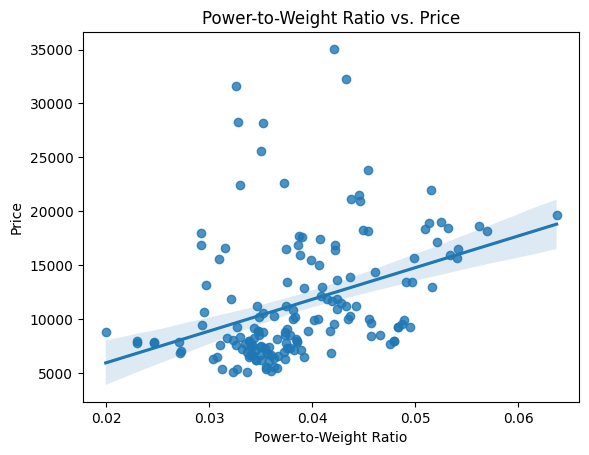

In [11]:
# Convert necessary columns to numeric
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')
automobile_df['curb-weight'] = pd.to_numeric(automobile_df['curb-weight'], errors='coerce')
automobile_df['price'] = pd.to_numeric(automobile_df['price'], errors='coerce')

# Drop rows with missing values (for simplicity in this example)
automobile_df.dropna(inplace=True)

# Create the new feature "power-to-weight ratio"
automobile_df['power-to-weight'] = automobile_df['horsepower'] / automobile_df['curb-weight']

# Plot the scatter plot with a line of best fit
sns.regplot(x='power-to-weight', y='price', data=automobile_df)
plt.title('Power-to-Weight Ratio vs. Price')
plt.xlabel('Power-to-Weight Ratio')
plt.ylabel('Price')
plt.show()

# Encode categorical variables
automobile_df_encoded = pd.get_dummies(automobile_df, drop_first=True)


###  Power to Weight Ratio

The scatter plot shows a positive relationship between the power-to-weight ratio and the price. As the power-to-weight ratio increases, the price of the vehicle also tends to increase. This suggests that vehicles with a higher power-to-weight ratio, which often indicate higher performance, are more expensive. High-powered vehicles are typically more costly due to their performance capabilities and the higher production costs associated with advanced engineering and materials.

Relationships between  engine size vs price

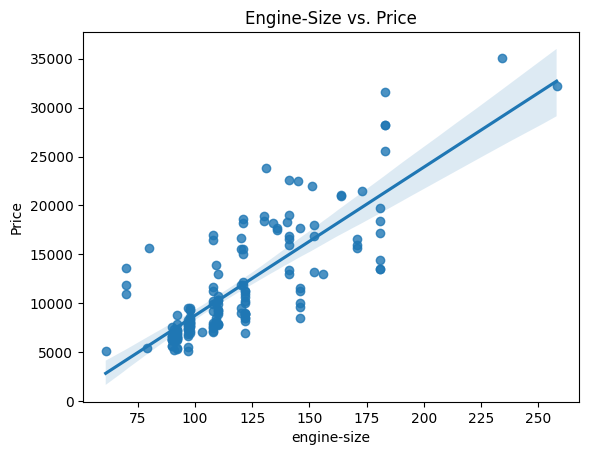

In [21]:

# Plot the scatter plot with a line of best fit
sns.regplot(x='engine-size', y='price', data=automobile_df)
plt.title('Engine-Size vs. Price')
plt.xlabel('engine-size')
plt.ylabel('Price')
plt.show()

# Encode categorical variables
automobile_df_encoded = pd.get_dummies(automobile_df, drop_first=True)

###  Engine-Size vs  Price 

The scatter plot shows a positive relationship between engine size and the price. As the engine size increases, the price of the vehicle also tends to increase. Larger engine sizes generally imply more powerful or higher-performance vehicles, which often come with a higher price tag due to the increased costs associated with manufacturing and technology

### Analysing prices of vehicles by  Body Style, Fuel Type, Aspiration and Make 

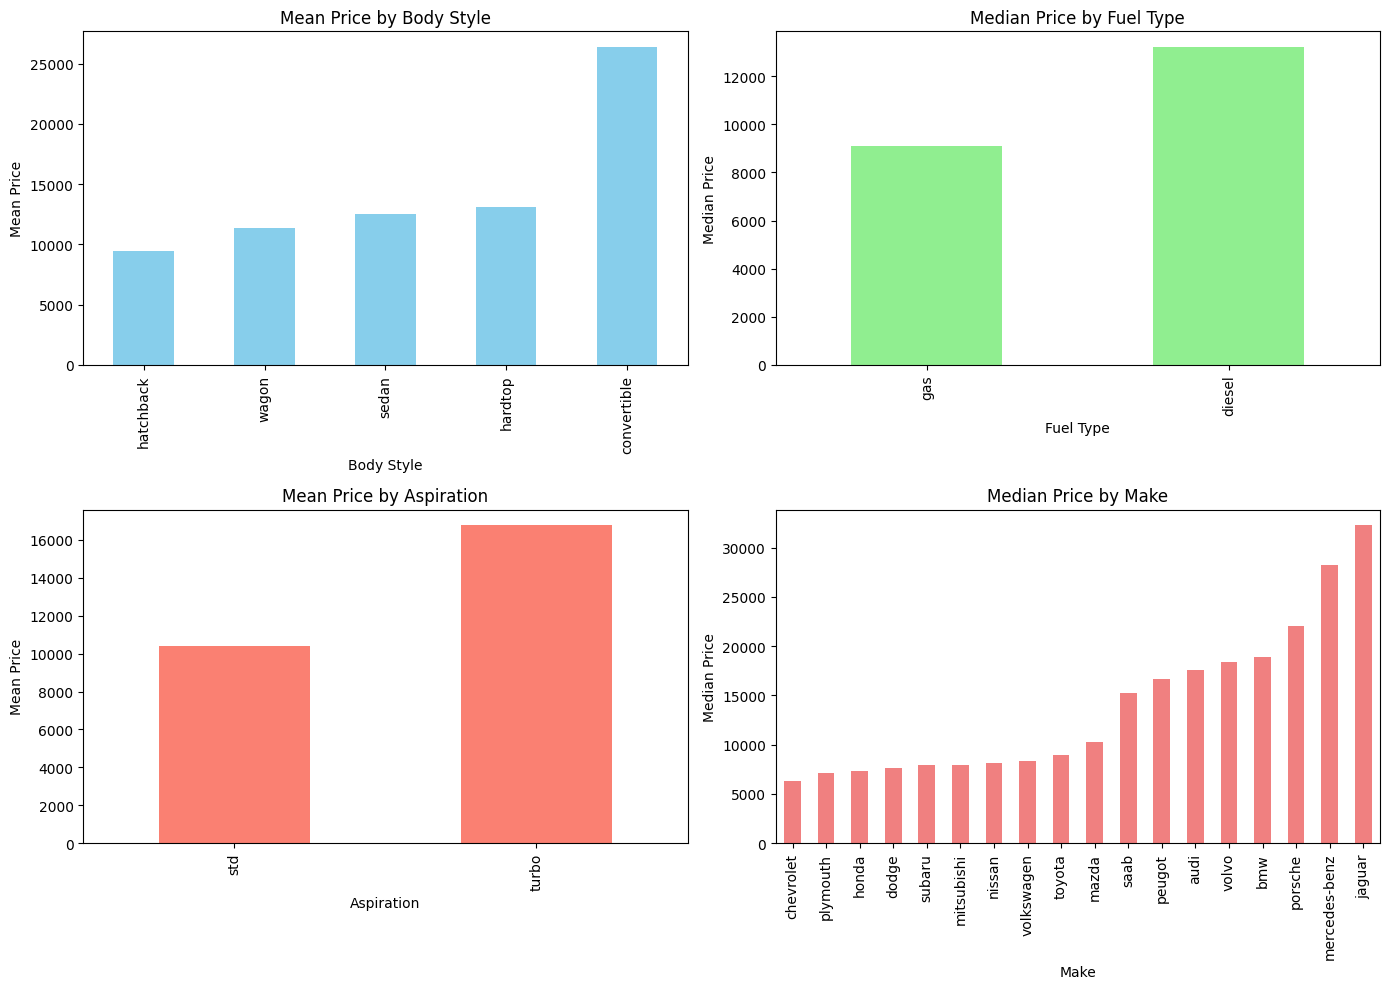

In [35]:
#Group by Body Style and calculate mean price
mean_prices_body_style = automobile_df.groupby('body-style')['price'].mean().sort_values()

# Group by Fuel Type and calculate median price
median_prices_fuel_type = automobile_df.groupby('fuel-type')['price'].median().sort_values()

# Group by Aspiration and calculate mean price
mean_prices_aspiration = automobile_df.groupby('aspiration')['price'].mean().sort_values()

# Group by Make and calculate median price
median_prices_make = automobile_df.groupby('make')['price'].median().sort_values()

# Plotting
plt.figure(figsize=(14, 10))

# Plot for Body Style
plt.subplot(2, 2, 1)
mean_prices_body_style.plot(kind='bar', color='skyblue')
plt.title('Mean Price by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Mean Price')

# Plot for Fuel Type
plt.subplot(2, 2, 2)
median_prices_fuel_type.plot(kind='bar', color='lightgreen')
plt.title('Median Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Median Price')

# Plot for Aspiration
plt.subplot(2, 2, 3)
mean_prices_aspiration.plot(kind='bar', color='salmon')
plt.title('Mean Price by Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Mean Price')

# Plot for Make
plt.subplot(2, 2, 4)
median_prices_make.plot(kind='bar', color='lightcoral')
plt.title('Median Price by Make')
plt.xlabel('Make')
plt.ylabel('Median Price')

plt.tight_layout()
plt.show()





### Interpretation 

1. Mean price by  body type.

The most expensive body type is the convertible. Convertible vehicles are considered luxurious, which typically makes them more expensive.

2.Median price by Fuel type 

Diesel vehicles have the highest median price. Diesel engines are often found in high-powered vehicles, which tend to be more expensive.

3. Mean Price by Aspiration 

Vehicles with turbochargers have a higher mean price. Turbocharged vehicles are usually high-powered, contributing to their higher price.

4.Meadian price by make 

The Jaguar brand has the highest median price, followed by Mercedes-Benz and Porsche. These brands are known for their luxury vehicles, which typically come with a higher price tag.